# Week 6: 2-Mode Networks

## Introduction

This week, we were asked to analyze a given dataset of the attendance of 18 Southern Women at 14 social events. The initial code to produce the dataset was provided. 

In [18]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import operator

In [4]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

In [8]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)

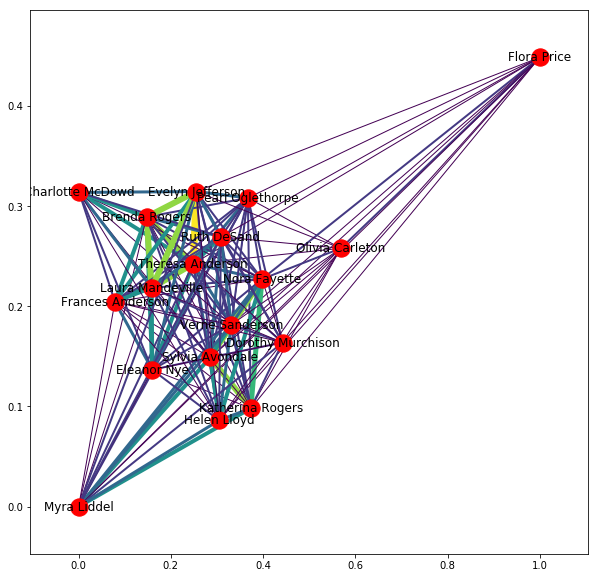

In [16]:
# Weighted edges based on common clubs
# textbook: SNAS pg. 104
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
plt.figure(figsize = (10,10))
nx.draw_networkx(W, width=weights, edge_color=weights)
plt.show()

## Measuring Centrality

Using NetworkX, the code below measures the centrality of the groups that the women are part of, and the events that they attend:

In [28]:
def centrality(W):
    c = nx.degree_centrality(W)
    sorted_c = dict(sorted(c.items(), key=operator.itemgetter(1)))
    return {k:round(v,2) for k, v in sorted_c.items()}

centrality(W)

{'Brenda Rogers': 0.88,
 'Charlotte McDowd': 0.65,
 'Dorothy Murchison': 0.94,
 'Eleanor Nye': 0.88,
 'Evelyn Jefferson': 1.0,
 'Flora Price': 0.71,
 'Frances Anderson': 0.88,
 'Helen Lloyd': 1.0,
 'Katherina Rogers': 0.94,
 'Laura Mandeville': 0.88,
 'Myra Liddel': 0.94,
 'Nora Fayette': 1.0,
 'Olivia Carleton': 0.71,
 'Pearl Oglethorpe': 0.94,
 'Ruth DeSand': 1.0,
 'Sylvia Avondale': 1.0,
 'Theresa Anderson': 1.0,
 'Verne Sanderson': 1.0}

In [31]:
E = nx.davis_southern_women_graph()
women = G.graph['top']
events = G.graph['bottom']

bi_E = bipartite.projected_graph(G, women)
bi_E = bipartite.weighted_projected_graph(G, women)

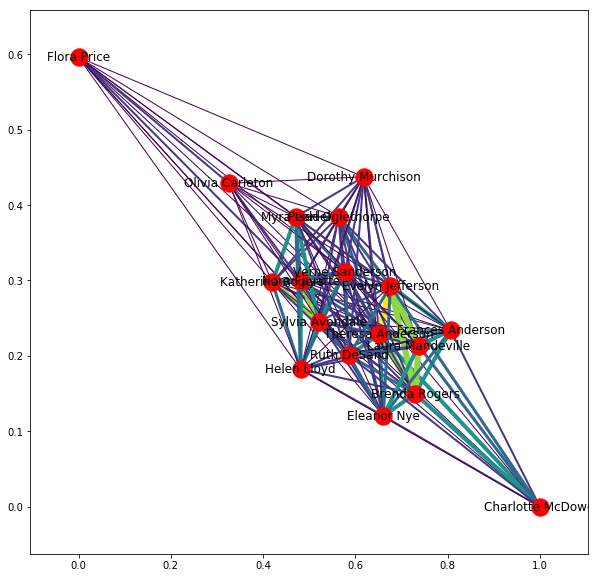

In [37]:
bi_E.edges(data=True)
weights=[edata['weight'] for f,t,edata in bi_E.edges(data=True)]
plt.figure(figsize=(10,10))
nx.draw_networkx(bi_E, width=weights, edge_color=weights)
plt.show()

In [38]:
centrality(bi_E)

{'Brenda Rogers': 0.88,
 'Charlotte McDowd': 0.65,
 'Dorothy Murchison': 0.94,
 'Eleanor Nye': 0.88,
 'Evelyn Jefferson': 1.0,
 'Flora Price': 0.71,
 'Frances Anderson': 0.88,
 'Helen Lloyd': 1.0,
 'Katherina Rogers': 0.94,
 'Laura Mandeville': 0.88,
 'Myra Liddel': 0.94,
 'Nora Fayette': 1.0,
 'Olivia Carleton': 0.71,
 'Pearl Oglethorpe': 0.94,
 'Ruth DeSand': 1.0,
 'Sylvia Avondale': 1.0,
 'Theresa Anderson': 1.0,
 'Verne Sanderson': 1.0}

## Conclusion

As we can see from both centrality measurements of events and groups, the women operate in a very small, closed network. The centrality for the events range between 0.65 and 1.0, while the centrality for groups range between 0.71 and 1.0. 